In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("../../Data/Kaggle/StoreSales/processed_train.csv")
test = pd.read_csv("../../Data/Kaggle/StoreSales/processed_test.csv")

In [3]:
train.head()

,id,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,0,1,0,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
1,1,1,1,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2,2,1,2,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
3,3,1,3,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
4,4,1,4,0.0,0,3,93.14,18,12,3,13,2,1,1,2013


In [4]:
test.head()

,id,store_nbr,family,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,3000888,1,0,0,4,46.8,18,12,3,13,3,16,8,2017
1,3000889,1,1,0,4,46.8,18,12,3,13,3,16,8,2017
2,3000890,1,2,2,4,46.8,18,12,3,13,3,16,8,2017
3,3000891,1,3,20,4,46.8,18,12,3,13,3,16,8,2017
4,3000892,1,4,0,4,46.8,18,12,3,13,3,16,8,2017


In [5]:
X = train.drop(['id','sales'], axis=1)
y = train['sales']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
time_steps = 10

In [9]:
X_train_reshaped = []
y_train_reshaped = []

In [10]:
for i in range(len(X_train_scaled) - time_steps):
    X_train_reshaped.append(X_train_scaled[i:i + time_steps])
    y_train_reshaped.append(y_train.values[i + time_steps])

In [11]:
X_train_reshaped = np.array(X_train_reshaped)
y_train_reshaped = np.array(y_train_reshaped)

In [12]:
X_test_reshaped = []
y_test_reshaped = []

In [13]:
for i in range(len(X_test_scaled) - time_steps):
    X_test_reshaped.append(X_test_scaled[i:i + time_steps])
    y_test_reshaped.append(y_test.values[i + time_steps])

In [14]:
X_test_reshaped = np.array(X_test_reshaped)
y_test_reshaped = np.array(y_test_reshaped)

In [15]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(X_train_reshaped, y_train_reshaped, epochs=10, batch_size=1000, validation_split=0.2)

Epoch 1/10
1921/1921 [==============================] - 9s 5ms/step - loss: 1309772.0000 - val_loss: 1305935.3750
Epoch 2/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1276227.1250 - val_loss: 1275560.8750
Epoch 3/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1257398.7500 - val_loss: 1284813.0000
Epoch 4/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1262827.2500 - val_loss: 1266742.7500
Epoch 5/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1243708.6250 - val_loss: 1249774.2500
Epoch 6/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1230930.6250 - val_loss: 1240768.2500
Epoch 7/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1222937.3750 - val_loss: 1233367.8750
Epoch 8/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1216816.5000 - val_loss: 1227936.5000
Epoch 9/10
1921/1921 [==============================] - 8s 4ms/step - loss: 1211995.2500

In [17]:
test_loss = model.evaluate(X_test_reshaped, y_test_reshaped)
print(f'Test Loss: {test_loss}')

18756/18756 [==============================] - 6s 327us/step - loss: 1245911.2500
Test Loss: 1245911.25


In [18]:
y_pred = model.predict(X_test_reshaped)

18756/18756 [==============================] - 6s 329us/step


In [19]:
model.save('rnn_model.h5')

/Users/yrrebeere/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_pred))
print("RMSE:", rmse)

RMSE: 1116.2039820770965


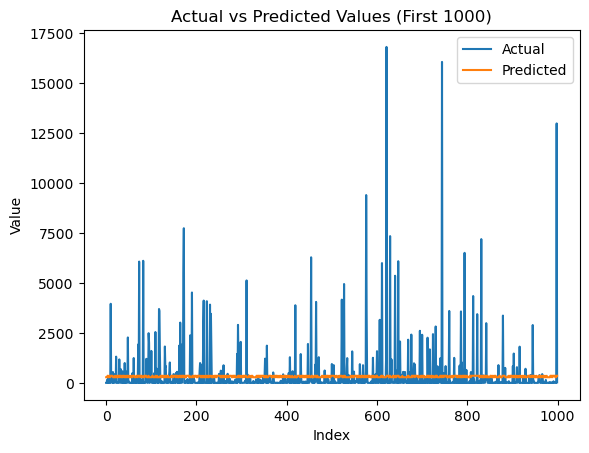

In [21]:
import matplotlib.pyplot as plt

# Assuming y_test_reshaped_flat and y_pred_flat are defined
# Adjust the length of y_pred_flat to match y_test_reshaped_flat

# Plotting actual values
plt.plot(y_test_reshaped[:1000], label='Actual')

# Plotting predicted values
plt.plot(y_pred[:1000], label='Predicted')

plt.title('Actual vs Predicted Values (First 1000)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()